In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk    

In [2]:
##reading dataset
df = pd.read_csv(r'C:\Users\GASTON\Desktop\Three projects real life\Reviews.csv')

print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

* HelpfulnessNumerator: people found useful count
* HelpfulnessDenominator: Denominator is both people found useful count + people found not so useful count

### Data Preparation

In [4]:
### add some columns for upvote metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

## En caso de que haya una review por lo menos, coloca el cociente, sino coloca -1. Genera una nueva columna.
## Sería como el porcentual de eficiencia de la recomendación.

In [5]:
df.head(n=3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0


In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %'],
      dtype='object')

#### assigning different different labels to helpful% according to its value

In [6]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [8]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
df.head(n=2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN


In [10]:
df.groupby(['Score', '%upvote']).agg('count')

# Primero agrupo en función del score asignado en los comentarios. Esto me dividiría en 5 grupos
# Luego, subagrupo de acuerdo al porcentual de utilidad del review, por lo cual me quedan 5 x 6 = 30 grupos
# Tengo que definir un método de agrupamiento: count.
# Como cuento los datos, van a estar todos repetidos. Luego me focalizo solo en Id.

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

#### considering only Id Column, as I have to count Total Upvotes for different different categories

In [11]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [12]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


#### create Pivot Table for better conclusion

In [13]:
df_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

#### create heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

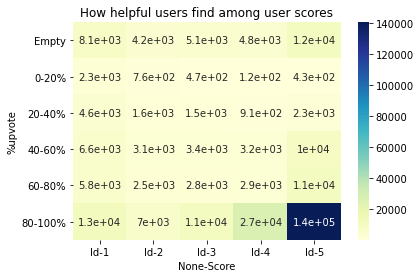

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

Esto significa, que los usuarios están encontrando muchos más utilizables aquellas reviews que otorgaron 5 estrellas, que aquellas que asinaron 1,2,3,4...

In [24]:
df.shape

(568454, 12)

In [26]:
df.head(n=2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN


In [15]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

Tenemos 5 posbiles calificaciones, pero particularmento la 3 no nos sirve para predecir nada, ya que no sería asignable a algo positivo o negativo, sino más bien neutro. Por lo cual procedemos a eliminar esas calificaciones.

In [16]:
df2 = df[df['Score'] != 3 ]
# Elimino las calificaciones evaluadas con 3.

In [17]:
df2.head(n=3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%


In [18]:
# Mis variables independientes van a ser aquellas de texto, mediante las cuales quiero predecor el score:
X = df2['Text']
X.head(n=3)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
Name: Text, dtype: object

In [19]:
# Tengo que llevar mi variable objetivo target a 0 o 1, por lo cual defino un diccionario para realizar el ajuste:
y_dict = {1:0, 2:0, 4:1, 5:1}

In [20]:
# Con la función MAP reemplazo en la variable target por lo que definimos en el diccionario:
y = df2['Score'].map(y_dict)
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Score, dtype: int64

De esta manera nos queda una matriz X con el texto, que tendremos que vectorizar, y por otro lado el target y, con scores positivos 1 (si fue calificado con 3 o 4) y 0 si fue calificado con 1 o 2.

#### Score prediction

### convert your text into vectors using NLP

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

# Defino el método para crear los vectores, utilizando stop words para eliminar las que no deseo (ex: and, or, etc.)

In [22]:
##takes almost 2 mins to execute
# Creo el vector X_c con el modelo creado c, sobre el conjunto de texto X
X_c = c.fit_transform(X)

In [23]:
print('La matriz X_c tiene:', X_c.shape[1], 'features.')

La matriz X_c tiene: 114969 features.


In [24]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [26]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [27]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9368904711914434


Verificar que la alta efectividad no sea por un dataset desbalanceado.

#### fetch Top 20 Positive & Top 20 negative words

In [28]:
w = c.get_feature_names()

In [29]:
len(w)

114969

Es la cantidad de columnas que se nos generó-

A c le apliqué un fit.transform, pasandole el texto X. Por lo cual ya está ajustado a nuestro dataset.

In [30]:
coef = ml.coef_.tolist()[0]
coef

0262778882,
 0.0,
 0.0,
 0.0,
 0.00011013799910546528,
 1.0500892608372686e-05,
 0.0013742865609966974,
 -0.05923785418112336,
 -0.22366291373978775,
 0.006679030169809974,
 -0.005235694525902688,
 0.0,
 0.0021500758124853646,
 0.0,
 0.0005656628147634123,
 0.10040631875370803,
 0.0,
 0.004698062729298499,
 -0.009210296840145961,
 0.6188908608537638,
 0.10193874678131083,
 0.0,
 -0.0009082852919368502,
 -0.001240607945911388,
 0.000496152506764827,
 0.0012622913239297932,
 -0.0007834833675660686,
 0.0,
 0.0,
 -0.01026122913775373,
 0.0034526032302926277,
 0.0034526032302926277,
 0.0,
 1.0195849263015315e-05,
 0.0013873897338280235,
 0.002797777842716418,
 0.09123409867280076,
 0.00045089530976898996,
 0.0,
 6.889208533624101e-05,
 0.07412385840125055,
 0.0005734506197900372,
 0.00034420189239686434,
 0.00013980105165159828,
 -0.6262649112672826,
 0.0002897551118066318,
 0.15038060703242193,
 0.0008241024475993736,
 -0.0009575826601861871,
 -0.05078301365214583,
 -0.025391506826072916,


In [31]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df
# Genero un dataframe con las palabras (features names) y los coeficientes (que peso tienen en la predicción del modelo)

,Word,Coefficient
0,00,-0.265940
1,000,-0.027381
2,0000,0.476623
3,000001,-0.002006
4,00001,0.001608
...,...,...
114964,çaykur,0.000850
114965,çelem,-0.136219
114966,être,0.015992
114967,île,0.011135


In [32]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.951034
39072,downside,3.599574
5865,addicting,2.890581
94667,skeptical,2.807151
39214,drawback,2.653132
...,...,...
106852,unacceptable,-3.028112
37560,disappointing,-3.041132
67898,mediocre,-3.288041
34989,deceptive,-3.493789


In [33]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

## Genero el ranking de las palabras más positivas y las más negativas, de acuerdo al peso que tienen en el modelo predictivo.

-Top 20 positive-
      Word  Coefficient
pleasantly     3.951034
  downside     3.599574
 addicting     2.890581
 skeptical     2.807151
  drawback     2.653132
   worries     2.501799
    hooked     2.357899
    solved     2.296694
economical     2.221210
    delish     2.204167
    resist     2.159025
  thankful     2.150864
   trainer     2.060547
  terrific     2.058773
 excellent     2.052602
 delighted     2.044400
  grateful     2.013335
       met     1.981523
  tastiest     1.980329
   welcome     1.953854


-Top 20 negative-
          Word  Coefficient
      terrible    -2.330232
    overpowers    -2.373950
         blech    -2.412150
       vomited    -2.456017
       allegro    -2.465789
         lousy    -2.520816
disappointment    -2.570077
       defeats    -2.594212
   embarrassed    -2.615286
   disapointed    -2.642945
        lacked    -2.745877
     cancelled    -2.759592
        ripoff    -2.891519
    returnable    -2.988118
         worst    -3.005039
  unaccept

#### lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy

In [34]:
### create a function 

def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [36]:

text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9364872883289972


-Top 20 positive-
      Word  Coefficient
pleasantly     3.472257
  downside     3.139731
 skeptical     2.865491
 addicting     2.833304
    resist     2.227641
  drawback     2.190604
  soothing     2.174475
    delish     2.115416
   worries     2.102333
   trainer     2.018412
   welcome     1.967572
economical     1.964617
       fav     1.949673
 excellent     1.937458
  tastiest     1.897142
  delivers     1.881124
    hooked     1.857826
 amazingly     1.855894
      whim     1.853668
   easiest     1.844185


-Top 20 negative-
          Word  Coefficient
        ruined    -2.187397
   unappealing    -2.212698
           ick    -2.223577
     cancelled    -2.264484
       defeats    -2.324817
disappointment    -2.347836
        ripoff    -2.402323
    overpowers    -2.408898
        bummer    -2.410162
      mediocre    -2.412512
   embarrassed    -2.434452
         lousy    -2.57

### Lets define a predict function

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:

predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 14896   2757]
 [  5438 108363]]
0.9376588007972371


#### Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.

In [40]:
from sklearn.dummy import DummyClassifier

In [41]:
### calling function for dummy classifier 
text_fit(X, y, c, DummyClassifier(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.8453071036256029


#### Logistic regression model on TFIDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9334824349202002


-Top 20 positive-
      Word  Coefficient
     great    13.731752
 delicious    12.460512
      best    12.127718
   perfect    10.671295
     loves     9.470682
 excellent     9.272611
      love     8.920465
    highly     8.709777
   amazing     7.971837
    hooked     7.891480
 wonderful     7.889949
   awesome     7.640833
      good     7.450188
      nice     7.447136
  favorite     7.149632
pleasantly     7.130983
     yummy     6.875855
   pleased     6.755215
 fantastic     6.725421
      glad     6.643615


-Top 20 negative-
          Word  Coefficient
    flavorless    -5.847833
        ruined    -5.932118
         stale    -5.994924
         worse    -6.113802
          yuck    -6.377176
     tasteless    -6.429063
        return    -6.508765
   undrinkable    -6.580529
         bland    -6.591529
    disgusting    -6.616197
         threw    -6.696446
          weak    -7.09

In [43]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14265   2246]
 [  6377 108566]]
0.9344029090023886


#### Upvote prediction

    We will be focusing on score 5 reviews, and get rid of comments with neutral votes

In [44]:
data = df[df['Score'] == 5]


In [45]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [46]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [47]:
X = data2['Text']

In [48]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [49]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
    Let's resample the data to get balanced data:

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tf=TfidfVectorizer()

In [52]:
X_c=tf.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [54]:
y_test.value_counts()

1.0    45519
0.0      810
Name: %upvote, dtype: int64

In [36]:
## RandomOverSampler to handle imbalanced data
# Hay que instalar Tensorflow

from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [44]:
os =  RandomOverSampler()

In [45]:
X_train_res, y_train_res = os.fit_sample(X_c, y)

In [46]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [55]:
from collections import Counter

In [56]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_class=LogisticRegression()

In [60]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [62]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [63]:

clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [64]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  818     0]
 [  699 44812]]
0.9849122579809623
